In [4]:
from dotenv import load_dotenv
load_dotenv()
import os

#### Creating tools

In [12]:
## Custom Functions
def add(a:int,b:int)->int:
    """Add two numbers"""
    return a+b

def divide(a:int,b:int)->int:
    """Divide two numbers"""
    return a/b

def multiply(a:int,b:int)->int:
    """Multiply two numbers"""
    return a*b

In [11]:
### Predefined Functions

from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.tools.tavily_search import TavilySearchResults

arxiv_api_wrapper = ArxivAPIWrapper(top_k_results=3,doc_content_chars_max=500)
arxiv = ArxivQueryRun(api_wrapper=arxiv_api_wrapper)

wiki_api_wrapper = WikipediaAPIWrapper(top_k_results=3,doc_content_chars_max=500)
wikipedia = WikipediaQueryRun(api_wrapper=wiki_api_wrapper)

tavily = TavilySearchResults()




In [13]:
tools = [add,divide,multiply,wikipedia,arxiv,tavily]

#### Creating a Model

In [16]:
from langchain_groq import ChatGroq

model = ChatGroq(model="llama-3.1-8b-instant")


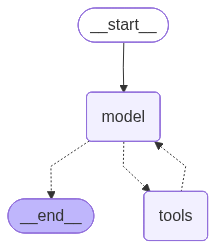

In [19]:
### Create an Agent

from langchain.agents import create_agent

agent = create_agent(
    tools=tools,
    model=model,
   
)
agent

In [31]:
agent.invoke({
    "messages": [
        {"role": "user", "content": "Explain arXiv paper using tavily"}
    ]
})


{'messages': [HumanMessage(content='Explain arXiv paper using tavily', additional_kwargs={}, response_metadata={}, id='00707c11-2d3f-4492-a9af-45e78e1abb82'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'chfydzbd4', 'function': {'arguments': '{"query":"arXiv paper"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 711, 'total_tokens': 732, 'completion_time': 0.023003945, 'completion_tokens_details': None, 'prompt_time': 0.040932582, 'prompt_tokens_details': None, 'queue_time': 0.055103198, 'total_time': 0.063936527}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b77e7-8b99-7e63-b8bf-19e45b62c17b-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'arXiv paper'}, 'id': 'chfydzbd4', 'type': 'tool_call'}], us